In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'],index_col= 'date')

In [3]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [4]:
# Clean data
df = df[
    (df["value"] >= df["value"].quantile(0.025))&
    (df["value"] <= df["value"].quantile(0.975))]


SyntaxError: 'return' outside function (3242363829.py, line 7)

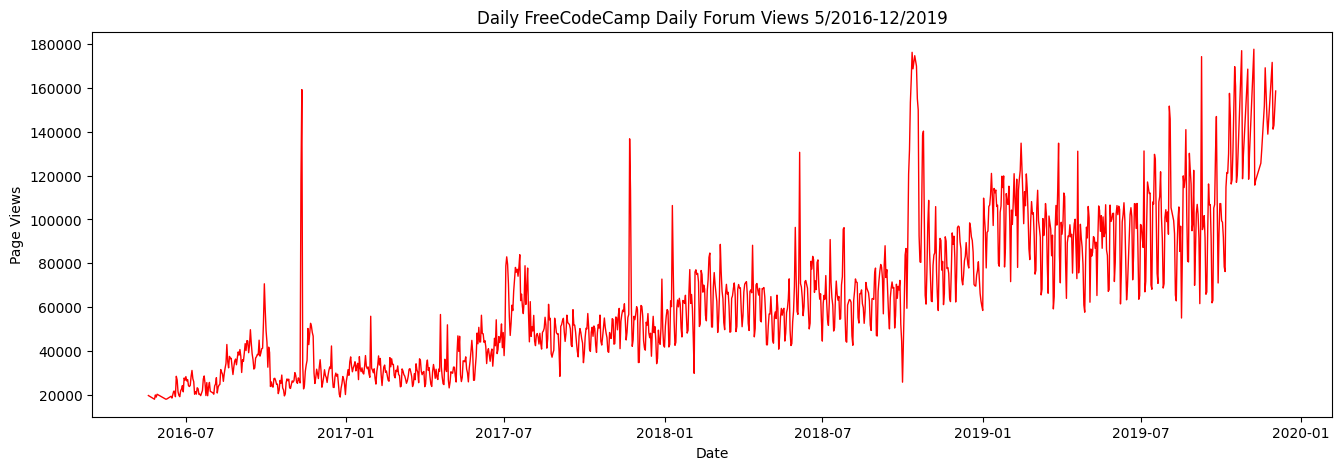

In [ ]:
fig, axe = plt.subplots(figsize=(16,5))
axe.plot(df.index, df['value'], 'r', linewidth=1)
axe.set_title('Daily FreeCodeCamp Daily Forum Views 5/2016-12/2019')
axe.set_xlabel('Date')
axe.set_ylabel('Page Views')
fig.savefig('fig.png')
return fig

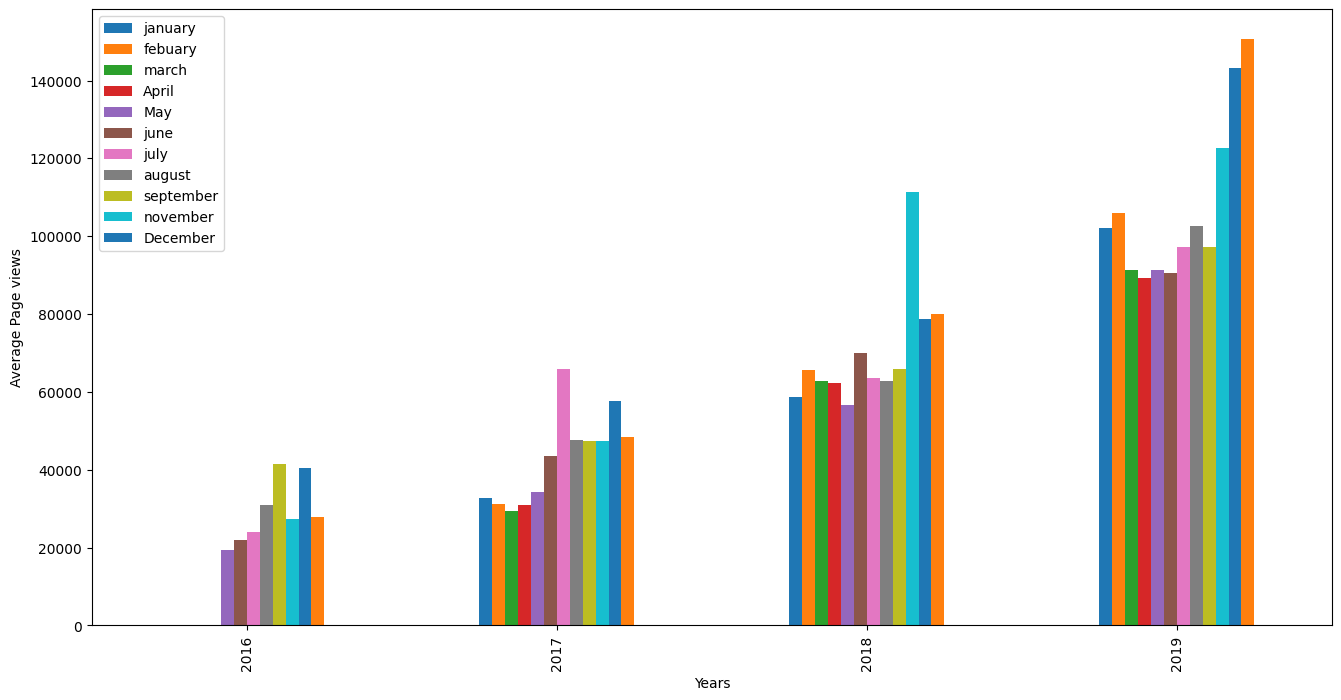

In [8]:
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack() 
    
    # Draw bar plot
    
fig = df_bar.plot.bar(legend=True, figsize = (16,8), ylabel='Average Page views',xlabel='Years').figure 
plt.legend(['january','febuary','march','April','May','june',
                'july','august','september','november','December'])



    # Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

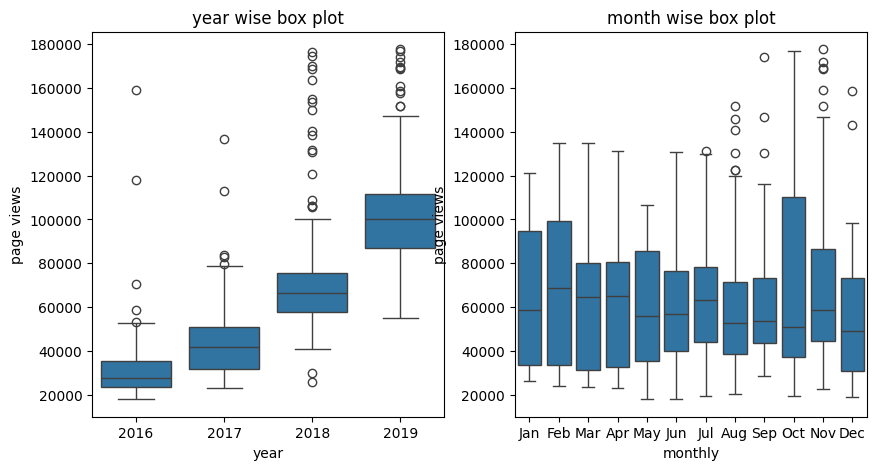

In [12]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
    
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axe[0] = sns.boxplot(x=df_box['year'],y=df_box['value'], ax=axe[0])
axe[1] = sns.boxplot(x=df_box['month'],y=df_box['value'], ax=axe[1])

axe[0].set_title('year wise box plot')
axe[0].set_xlabel('year')
axe[0].set_ylabel('page views')


axe[1].set_title('month wise box plot')
axe[1].set_xlabel('monthly')
axe[1].set_ylabel('page views')

    
    # Save image and return fig (don't change this part)
fig.savefig('box_plot.png')